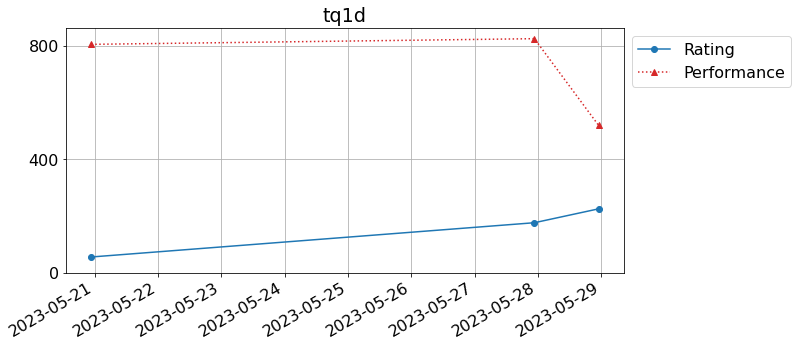

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'

USERNAME = "tq1d"
try:
    # データ取得
    url = f'https://atcoder.jp/users/{USERNAME}/history/json'
    df = pd.read_json(url, convert_dates=['EndTime'])
    df.set_index('EndTime', inplace=True)
    df = df.query('IsRated').copy()  # Ratedのみレコードを抽出
    # パフォーマンス補正  https://qiita.com/anqooqie/items/92005e337a0d2569bdbd#性質4-初心者への慈悲
    func = lambda p: int(400.0 / np.e**((400.0 - p)/400.0)) if p < 400 else p
    df['Perf'] = df['Performance'].apply(func)
    # グラフ作成
    ax = df[['NewRating']].plot(marker='o', c='C0')
    df[['Perf']].plot(ax=ax, c='C3', ls=':', marker='^', ylim=(0, None), grid=True)
    ax.set_xlabel('')
    if df[['NewRating', 'Perf']].max().max() > 400:
        ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.legend(['Rating', 'Performance'], bbox_to_anchor=(1, 1), loc=2)
    _ = ax.set_title(USERNAME)
except:
    print('Error! No Data.')